In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mat
import statsmodels.api as stat
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

from sklearn.cluster import KMeans

In [49]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

california = fetch_california_housing(as_frame=True)
df = california.frame

df.describe(include='all')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [77]:
target = df['MedHouseVal']

test = df.drop(['MedHouseVal'], axis=1)

In [78]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(test,target, test_size=.2, random_state=3)

In [79]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [80]:
reg.score(x_train, y_train)

0.6079255040976556

In [91]:
y_hat = reg.predict(x_train)


,Y-hat
0,2.222826
1,2.437469
2,1.502301
3,2.021235
4,1.971897
...,...
16507,1.988341
16508,1.809604
16509,2.764573
16510,2.867266


In [83]:
d = pd.DataFrame()
d['Actual value']= y_train
d['Predict val']= y_hat
d['Difference']= d['Actual value']-d['Predict val']
d['%']=abs(d['Difference'])*100/d['Actual value']
d.describe()

,Actual value,Predict val,Difference,%
count,16512.000000,16512.000000,1.651200e+04,16512.000000
mean,2.069859,2.069859,-1.096082e-14,31.781195
std,1.154927,0.900492,7.231677e-01,38.223157
min,0.149990,-1.010817,-5.927856e+00,0.000456
25%,1.198000,1.496853,-4.612751e-01,10.587237
50%,1.801000,2.024274,-1.272314e-01,23.080716
75%,2.646000,2.555865,3.148149e-01,41.306992
max,5.000010,7.251202,4.191036e+00,1628.072547


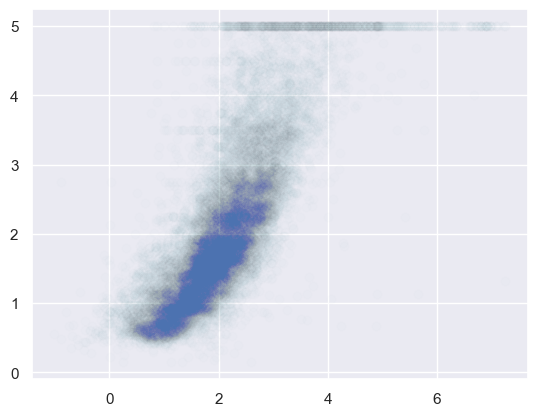

In [97]:
mat.scatter(y_hat, y_train, alpha=.009)